In [38]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.shape

(284807, 31)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
import numpy as np
df['random1'] = np.random.sample(df.shape[0])
df['random2'] = np.random.sample(df.shape[0])
df['random3'] = np.random.sample(df.shape[0])
df['random4'] = np.random.sample(df.shape[0])

In [51]:
from sklearn.model_selection import train_test_split
data = df.drop('Class', axis = 1)
Class = pd.DataFrame(df['Class'])

X_train, X_test, Y_train, Y_test = train_test_split(data, Class, test_size=0.2, random_state=123)

In [6]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = X_train.columns
    for i in range(0, X_train.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = X_train.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 30))

Top Absolute Correlations
V2    Amount    0.527563
Time  V3        0.422196
V7    Amount    0.404840
V5    Amount    0.392879
V20   Amount    0.320717
Time  V11       0.247758
      V25       0.232434
V1    Amount    0.229321
V6    Amount    0.220900
V3    Amount    0.215267
Time  V15       0.181588
      V5        0.170464
      V22       0.144490
      V12       0.125896
V23   Amount    0.125314
Time  V1        0.116033
V8    Amount    0.105901
Time  V4        0.105076
V10   Amount    0.102138
V4    Amount    0.099472
Time  V14       0.098350
V21   Amount    0.097914
Time  V18       0.088892
      V7        0.084869
      V17       0.074870
      V13       0.066134
V22   Amount    0.063125
Time  V6        0.062133
V19   Amount    0.055549
Time  V20       0.051072
dtype: float64


In [37]:
from lazypredict.Supervised import LazyClassifier

In [38]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)

print(models)

100%|██████████| 29/29 [21:13<00:00, 43.90s/it]  

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.97               0.94     0.94      0.99   
GaussianNB                         0.98               0.91     0.91      0.99   
DecisionTreeClassifier             1.00               0.90     0.90      1.00   
RandomForestClassifier             1.00               0.90     0.90      1.00   
ExtraTreesClassifier               1.00               0.90     0.90      1.00   
BaggingClassifier                  1.00               0.90     0.90      1.00   
XGBClassifier                      1.00               0.90     0.90      1.00   
KNeighborsClassifier               1.00               0.90     0.90      1.00   
LinearDiscriminantAnalysis         1.00               0.88     0.88      1.00   
NearestCentroid                    1.00               0.88     0.88      1.00   
LinearSVC                   

In [39]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.97,0.94,0.94,0.99,1.20
GaussianNB,0.98,0.91,0.91,0.99,0.64
DecisionTreeClassifier,1.00,0.90,0.90,1.00,19.33
RandomForestClassifier,1.00,0.90,0.90,1.00,328.55
ExtraTreesClassifier,1.00,0.90,0.90,1.00,32.00
BaggingClassifier,1.00,0.90,0.90,1.00,182.52
XGBClassifier,1.00,0.90,0.90,1.00,32.58
KNeighborsClassifier,1.00,0.90,0.90,1.00,21.10
LinearDiscriminantAnalysis,1.00,0.88,0.88,1.00,1.87


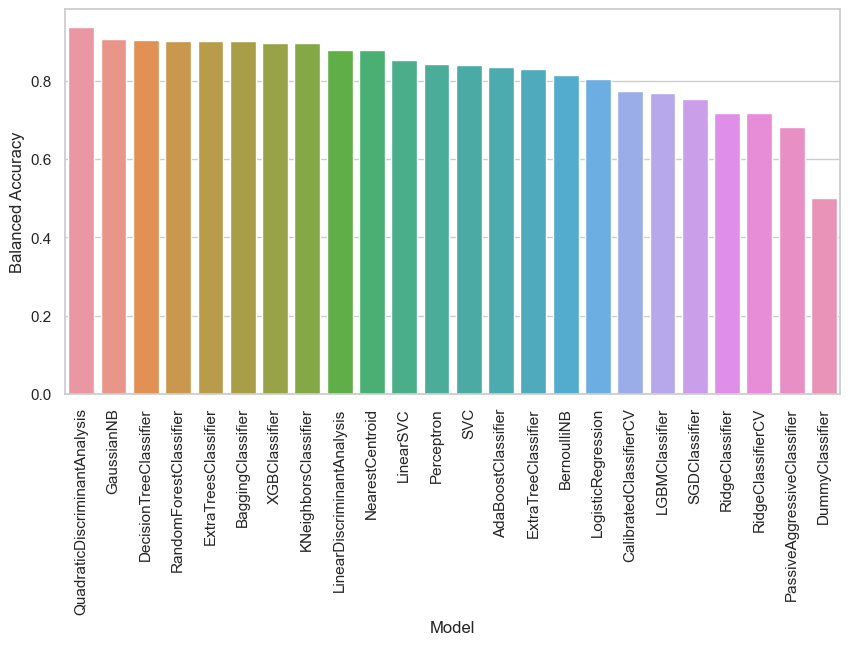

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models.index, y="Balanced Accuracy", data=models)
plt.xticks(rotation=90);

In [41]:
LinearDiscriminantAnalysis_probas = clf.models['LinearDiscriminantAnalysis'].predict_proba(X_test)
AdaBoostClassifier_probas = clf.models['AdaBoostClassifier'].predict_proba(X_test)
GaussianNB_probas = clf.models['GaussianNB'].predict_proba(X_test)
QuadraticDiscriminantAnalysis_probas = clf.models['QuadraticDiscriminantAnalysis'].predict_proba(X_test)
LogisticRegression_probas = clf.models['LogisticRegression'].predict_proba(X_test)
LGBMClassifier_probas = clf.models['LGBMClassifier'].predict_proba(X_test)
XGBClassifier_probas = clf.models['XGBClassifier'].predict_proba(X_test)
CalibratedClassifierCV_probas = clf.models['CalibratedClassifierCV'].predict_proba(X_test)
#Perceptron_probas = clf.models['Perceptron'].predict_proba(X_test) 'Perceptron' object has no attribute 'predict_proba'
DecisionTreeClassifier_probas = clf.models['DecisionTreeClassifier'].predict_proba(X_test)
#LinearSVC_probas = clf.models['LinearSVC'].predict_proba(X_test) #'LinearSVC' object has no attribute 'predict_proba'
KNeighborsClassifier_probas = clf.models['KNeighborsClassifier'].predict_proba(X_test)
ExtraTreeClassifier_probas = clf.models['ExtraTreeClassifier'].predict_proba(X_test)
ExtraTreesClassifier_probas = clf.models['ExtraTreesClassifier'].predict_proba(X_test)
#RidgeClassifier_probas = clf.models['RidgeClassifier'].predict_proba(X_test) 'RidgeClassifier' object has no attribute 'predict_proba'
#RidgeClassifierCV_probas = clf.models['RidgeClassifierCV'].predict_proba(X_test) 'RidgeClassifier' object has no attribute 'predict_proba'
BaggingClassifier_probas = clf.models['BaggingClassifier'].predict_proba(X_test)
RandomForestClassifier_probas = clf.models['RandomForestClassifier'].predict_proba(X_test)
#SVC_probas = clf.models['SVC'].predict_proba(X_test) #raise AttributeError("predict_proba only implemented for SVC and NuSVC") AttributeError: predict_proba is not available when  probability=False
#PassiveAggressiveClassifier_probas = clf.models['PassiveAggressiveClassifier'].predict_proba(X_test) 'PassiveAggressiveClassifier' object has no attribute 'predict_proba'
#SGDClassifier_probas = clf.models['SGDClassifier'].predict_proba(X_test) probability estimates are not available for loss='hinge'
DummyClassifier_probas = clf.models['DummyClassifier'].predict_proba(X_test)

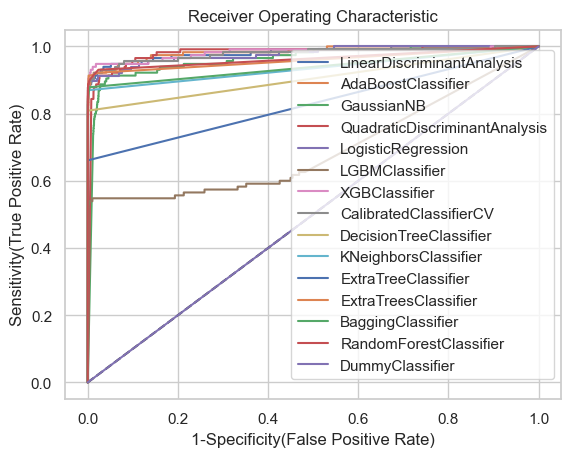

In [42]:
from sklearn.metrics import roc_curve
fpr2 , tpr2, thresholds2 = roc_curve(Y_test, LinearDiscriminantAnalysis_probas[:,1])
fpr3 , tpr3, thresholds3 = roc_curve(Y_test, AdaBoostClassifier_probas[:,1])
fpr4 , tpr4, thresholds4 = roc_curve(Y_test, GaussianNB_probas[:,1])
fpr5 , tpr5, thresholds5 = roc_curve(Y_test, QuadraticDiscriminantAnalysis_probas[:,1])
fpr6 , tpr6, thresholds6 = roc_curve(Y_test, LogisticRegression_probas[:,1])
fpr7 , tpr7, thresholds7 = roc_curve(Y_test, LGBMClassifier_probas[:,1])
fpr8 , tpr8, thresholds8 = roc_curve(Y_test, XGBClassifier_probas[:,1])
fpr9 , tpr9, thresholds9 = roc_curve(Y_test, CalibratedClassifierCV_probas[:,1])
fpr10 , tpr10, thresholds10 = roc_curve(Y_test, DecisionTreeClassifier_probas[:,1])
fpr11 , tpr11, thresholds11 = roc_curve(Y_test, KNeighborsClassifier_probas[:,1])
fpr12 , tpr12, thresholds12 = roc_curve(Y_test, ExtraTreeClassifier_probas[:,1])
fpr13 , tpr13, thresholds13 = roc_curve(Y_test, ExtraTreesClassifier_probas[:,1])
fpr14 , tpr14, thresholds14 = roc_curve(Y_test, BaggingClassifier_probas[:,1])
fpr15 , tpr15, thresholds15 = roc_curve(Y_test, RandomForestClassifier_probas[:,1])
fpr16 , tpr16, thresholds18 = roc_curve(Y_test, DummyClassifier_probas[:,1])

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr2, tpr2, label= "LinearDiscriminantAnalysis")
plt.plot(fpr3, tpr3, label= "AdaBoostClassifier")
plt.plot(fpr4, tpr4, label= "GaussianNB")
plt.plot(fpr5, tpr5, label= "QuadraticDiscriminantAnalysis")
plt.plot(fpr6, tpr6, label= "LogisticRegression")
plt.plot(fpr7, tpr7, label= "LGBMClassifier")
plt.plot(fpr8, tpr8, label= "XGBClassifier")
plt.plot(fpr9, tpr9, label= "CalibratedClassifierCV")
plt.plot(fpr10, tpr10, label= "DecisionTreeClassifier")
plt.plot(fpr11, tpr11, label= "KNeighborsClassifier")
plt.plot(fpr12, tpr12, label= "ExtraTreeClassifier")
plt.plot(fpr13, tpr13, label= "ExtraTreesClassifier")
plt.plot(fpr14, tpr14, label= "BaggingClassifier")
plt.plot(fpr15, tpr15, label= "RandomForestClassifier")
plt.plot(fpr16, tpr16, label= "DummyClassifier")

plt.legend()
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='center right')
plt.show()

In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import recall_score, precision_score, f1_score, cohen_kappa_score, roc_auc_score, classification_report, confusion_matrix,accuracy_score

In [8]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, Y_train.values.ravel())

clf_pred  = clf.predict(X_test)
print('Kappa:',cohen_kappa_score(clf_pred, Y_test))
print('Accuracy:', accuracy_score(clf_pred, Y_test))
print('Recall:',recall_score(clf_pred, Y_test))
print('Precison:',precision_score(clf_pred, Y_test))
print('F1 score:',f1_score(clf_pred, Y_test))
print('Macierz pomyłek:')
print(confusion_matrix(clf_pred, Y_test))
print(classification_report(clf_pred, Y_test))

Kappa: 0.12466837125870012
Accuracy: 0.9753519890453285
Recall: 0.06889632107023412
Precison: 0.8956521739130435
F1 score: 0.12795031055900621
Macierz pomyłek:
[[55455    12]
 [ 1392   103]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     55467
           1       0.90      0.07      0.13      1495

    accuracy                           0.98     56962
   macro avg       0.94      0.53      0.56     56962
weighted avg       0.97      0.98      0.96     56962



In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, Y_train.values.ravel())

clf_pred  = clf.predict(X_test)
print('Kappa:',cohen_kappa_score(clf_pred, Y_test))
print('Accuracy:', accuracy_score(clf_pred, Y_test))
print('Recall:',recall_score(clf_pred, Y_test))
print('Precison:',precision_score(clf_pred, Y_test))
print('F1 score:',f1_score(clf_pred, Y_test))
print('Macierz pomyłek:')
print(confusion_matrix(clf_pred, Y_test))
print(classification_report(clf_pred, Y_test))

Kappa: 0.8623062854060156
Accuracy: 0.9994908886626171
Recall: 0.9479166666666666
Precison: 0.7913043478260869
F1 score: 0.8625592417061612
Macierz pomyłek:
[[56842    24]
 [    5    91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.79      0.95      0.86        96

    accuracy                           1.00     56962
   macro avg       0.90      0.97      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [25]:
clf_prob = (clf.predict_proba(X_test))[:,1]
a = Y_test
a['probablity']=clf_prob

In [26]:
a.head()

,Class,probablity
73129,0,0.0
229597,0,0.0
220218,0,0.0
198374,0,0.0
167980,0,0.0


In [27]:
a['probablity'].value_counts()

0.00    55366
0.01     1116
0.02      192
0.03       87
0.04       28
        ...  
0.54        1
0.21        1
0.50        1
0.88        1
0.17        1
Name: probablity, Length: 72, dtype: int64

In [30]:
a['Class'].value_counts()

0    56847
1      115
Name: Class, dtype: int64

In [33]:
class_1=a[a['Class']==1]
class_0=a[a['Class']==0]

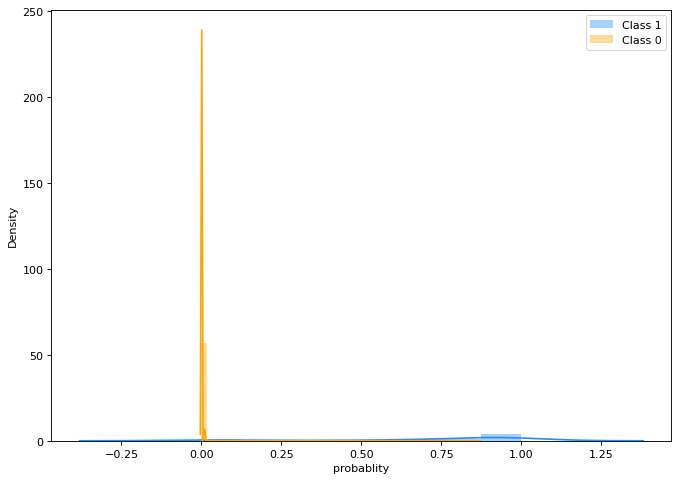

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
x1 = a.loc[a.Class==1, 'probablity']
x2 = a.loc[a.Class==0, 'probablity']

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Class 1",hist=True)
sns.distplot(x2, color="orange", label="Class 0",hist=True)
plt.legend();

In [40]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': clf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

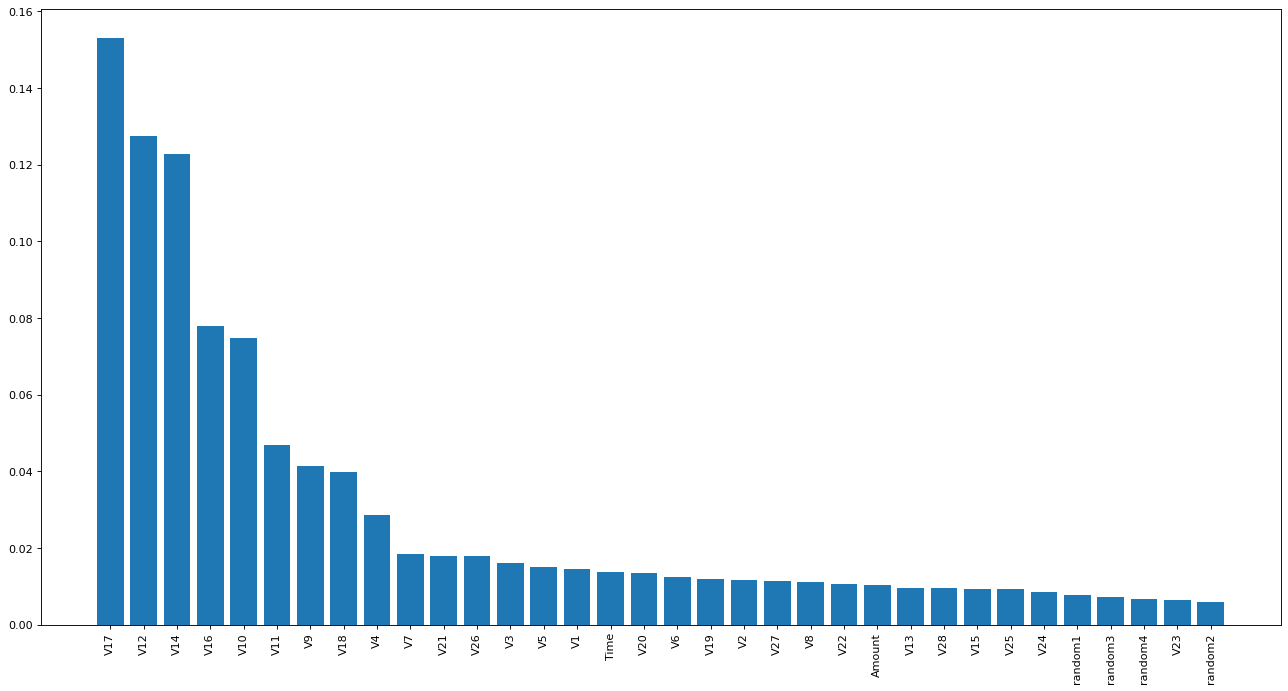

In [41]:
plt.figure(figsize=(20,10), dpi= 80)
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
#liczba drzew w lesie
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 100, num = 5)]
# liczba cech do rozważenia przy każdym podziale
max_features = ['auto', 'sqrt']
# maksymalna liczba poziomów w każdym drzewie
max_depth = [int(x) for x in np.linspace(5, 15, num = 3)]
max_depth.append(None)
# Minimalna liczba cech przy każdym podziale
min_samples_leaf = [1, 2]
# Metoda wyboru przykładów do trenowania każdego drzewa
bootstrap = [True, False]

# Utworzenie siatki do losowego przeszukania
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [20, 40, 60, 80, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, None], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [44]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train.values.ravel())

rf_random.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'n_estimators': 40,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [52]:
clf = RandomForestClassifier(n_estimators = 40, min_samples_leaf = 1,max_features='auto',max_depth=None,bootstrap=False)
clf.fit(X_train, Y_train.values.ravel())

clf_pred  = clf.predict(X_test)
print('Kappa:',cohen_kappa_score(clf_pred, Y_test))
print('Accuracy:', accuracy_score(clf_pred, Y_test))
print('Recall:',recall_score(clf_pred, Y_test))
print('Precison:',precision_score(clf_pred, Y_test))
print('F1 score:',f1_score(clf_pred, Y_test))
print('Macierz pomyłek:')
print(confusion_matrix(clf_pred, Y_test))
print(classification_report(clf_pred, Y_test))

Kappa: 0.8608483878832256
Accuracy: 0.9994733330992591
Recall: 0.9207920792079208
Precison: 0.808695652173913
F1 score: 0.8611111111111112
Macierz pomyłek:
[[56839    22]
 [    8    93]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.81      0.92      0.86       101

    accuracy                           1.00     56962
   macro avg       0.90      0.96      0.93     56962
weighted avg       1.00      1.00      1.00     56962

